In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [2]:
df = pd.read_excel('Анкета_работники.xlsx', sheet_name='Sheet')

In [3]:
names = df.columns.tolist()[4:] # сохраним имена столбцов
# сократил название
names[1] = '2. Насколько, по Вашему мнению, содержание, планируемые результаты освоения ОПВО соответствуют требованиям профессиональных стандартов'

In [4]:
# проверим на наличие пропусков
df.isna().sum()

Уровень образования:                                                                                                                                                                                                                                     0
Направление подготовки                                                                                                                                                                                                                                  75
Направление подготовки.1                                                                                                                                                                                                                               138
Направления подготовки                                                                                                                                                                                                                                 

In [5]:
# заменяем NaN
df = df.fillna('Нет данных')

In [6]:
# собираем первые 3 столбца в 1
for i in range(len(df[df.columns[1]])):
    if df[df.columns[1]][i] == 'Нет данных':
        if df[df.columns[2]][i] != 'Нет данных':
            df[df.columns[1]][i] = df[df.columns[2]][i]
        else:
            df[df.columns[1]][i] = df[df.columns[3]][i]

In [7]:
# теперь удаляем 2 и 3 столбцы
df.drop([df.columns[2], df.columns[3]], axis=1, inplace=True)

In [8]:
# переименуем имена колонок в более удобный формат
df = df.rename(columns={i: i.replace(' ', '_').strip(':?') for i in df.columns})

In [9]:
# отберем бакалавриат
df_bac = df.query('Уровень_образования == "Бакалавриат" or Уровень_образования == "Специалитет"')

In [10]:
df_bac.head()

,Уровень_образования,Направление_подготовки,1._Насколько_Вы_удовлетворены_организацией_образовательного_процесса_по_образовательной_программе_в_целом,"2._Насколько,_по_Вашему_мнению,_содержание,_планируемые_результаты_освоения_ОПВО_соответствуют_требованиям_профессиональных_стандартов_(при_наличии),_либо_требованиям_к_профессиональным_компетенциям,_предъявляемым_к_выпускникам_на_рынке_труда","3._Насколько,_по_Вашему_мнению,_состав_и_содержание_дисциплин_(модулей)_соответствуют_формированию_заявленных_в_образовательной_программе_компетенций","4._Насколько_Вы_удовлетворены_сбалансированностью_компонентов_образовательной_программы_(дисциплин_(модулей),_практик_и_т.д.)_в_учебном_плане","5._Каким,_по_Вашему_мнению,_должно_быть_оптимальное_соотношение_теоретических_и_практических_занятий_для_качественной_подготовки_обучающихся",6._Насколько_Вы_удовлетворены_качеством_подготовки_обучающихся_по_программе_в_целом,7._Насколько_Вы_удовлетворены_уровнем_теоретической_подготовки_обучающихся,8._Насколько_Вы_удовлетворены_уровнем_практической_подготовки_обучающихся,9._Насколько_Вы_удовлетворены_уровнем_подготовки_выпускников_в_области_ИТ,10._Насколько_Вы_удовлетворены_способностью_обучающихся_к_самообразованию
1,Бакалавриат,Менеджмент,В большей мере удовлетворен,В большей мере соответствуют,В большей мере соответствуют,В большей мере удовлетворен,30% теория /70% практика,Удовлетворен в большей мере,Удовлетворен в большей мере,Частично удовлетворен,Частично удовлетворен,Удовлетворен в большей мере
2,Бакалавриат,Государственное и муниципальное управление,В большей мере удовлетворен,В большей мере соответствуют,В большей мере соответствуют,В большей мере удовлетворен,30% теория /70% практика,Удовлетворен в большей мере,Удовлетворен в большей мере,Частично удовлетворен,Удовлетворен в большей мере,Частично удовлетворен
3,Бакалавриат,Юриспруденция (уголовно-правовой профиль),Полностью удовлетворен,Полностью соответствуют,Полностью соответствую,Полностью удовлетворен,50% теория /50% практика,Удовлетворен в большей мере,Удовлетворен в большей мере,Удовлетворен в большей мере,Удовлетворен в большей мере,Частично удовлетворен
4,Бакалавриат,Юриспруденция (гражданско-правовой профиль),Полностью удовлетворен,Полностью соответствуют,Полностью соответствую,Полностью удовлетворен,50% теория /50% практика,Удовлетворен в большей мере,Удовлетворен в большей мере,Удовлетворен в большей мере,Удовлетворен в большей мере,Частично удовлетворен
6,Специалитет,Экономическая безопасность,В большей мере удовлетворен,В большей мере соответствуют,В большей мере соответствуют,В большей мере удовлетворен,Иное,Частично удовлетворен,Частично удовлетворен,Частично удовлетворен,Частично удовлетворен,Частично удовлетворен


In [11]:
# группировка по уровню образования в целом излишняя, но мне показалось так для сводной таблицы удобнее
results = []
# строим сводную таблицу для каждого столбца
for col in df_bac[[x for x in df_bac.columns if x not in ('Уровень_образования', 'Направление_подготовки')]]:
  res = count_results = df_bac.groupby(['Направление_подготовки', col], as_index=False) \
    .agg({'Уровень_образования': 'count'}) \
    .pivot(index='Направление_подготовки', columns=col, values='Уровень_образования') \
    .fillna(0)
  res['Итог'] = np.sum(res[res.columns], axis=1) # считаем общий итог
  
  # пересчитываем в проценты для каждой сводной таблицы
  for r in res.columns:
    res[f'{r}'] = (res[f'{r}'] / res['Итог'] * 100).round(2)
  results.append(res) # добавляем в общий список

In [12]:
# для примера взглянем на первую сводную таблицу из списка
results[0]

1._Насколько_Вы_удовлетворены_организацией_образовательного_процесса_по_образовательной_программе_в_целом,В большей мере удовлетворен,Не удовлетворен,Полностью удовлетворен,Итог
Направление_подготовки,,,,
Государственное и муниципальное управление,41.67,4.17,54.17,100.0
Менеджмент,44.44,0.00,55.56,100.0
Экономика,36.84,0.00,63.16,100.0
Экономическая безопасность,40.00,0.00,60.00,100.0
Юриспруденция (гражданско-правовой профиль),21.43,0.00,78.57,100.0
Юриспруденция (уголовно-правовой профиль),16.67,0.00,83.33,100.0


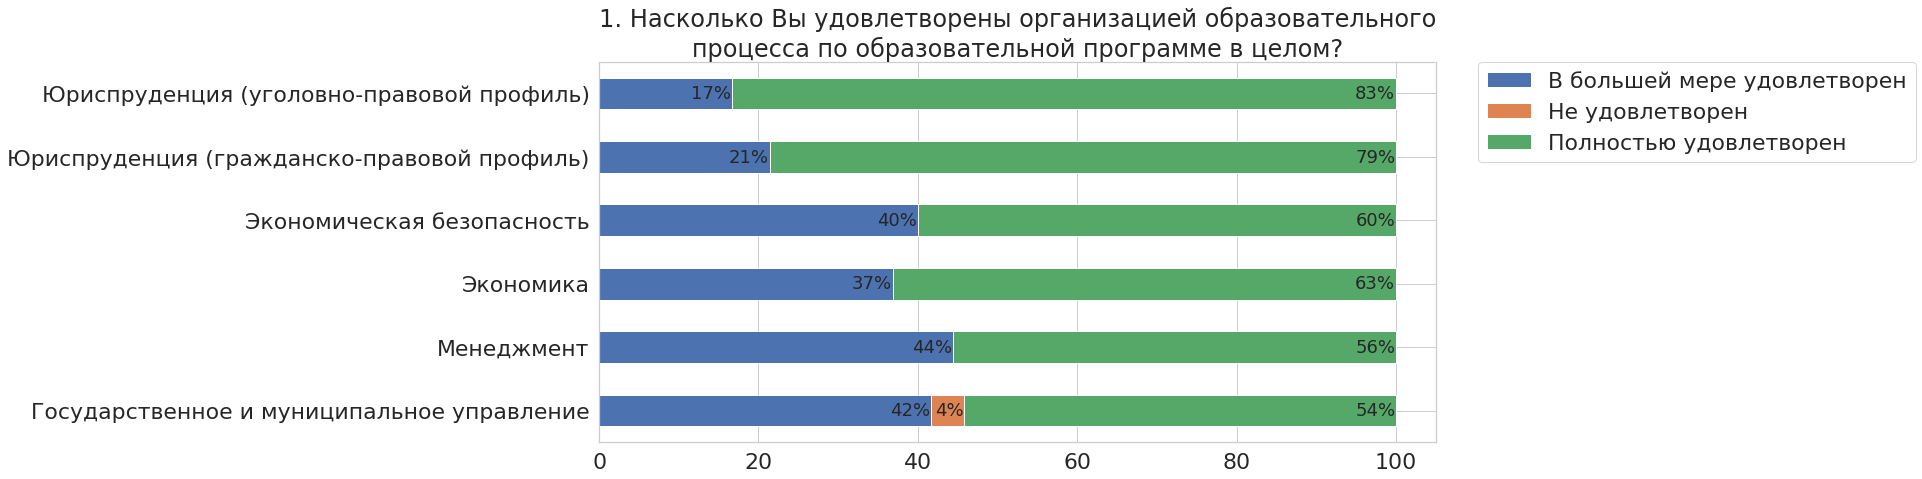

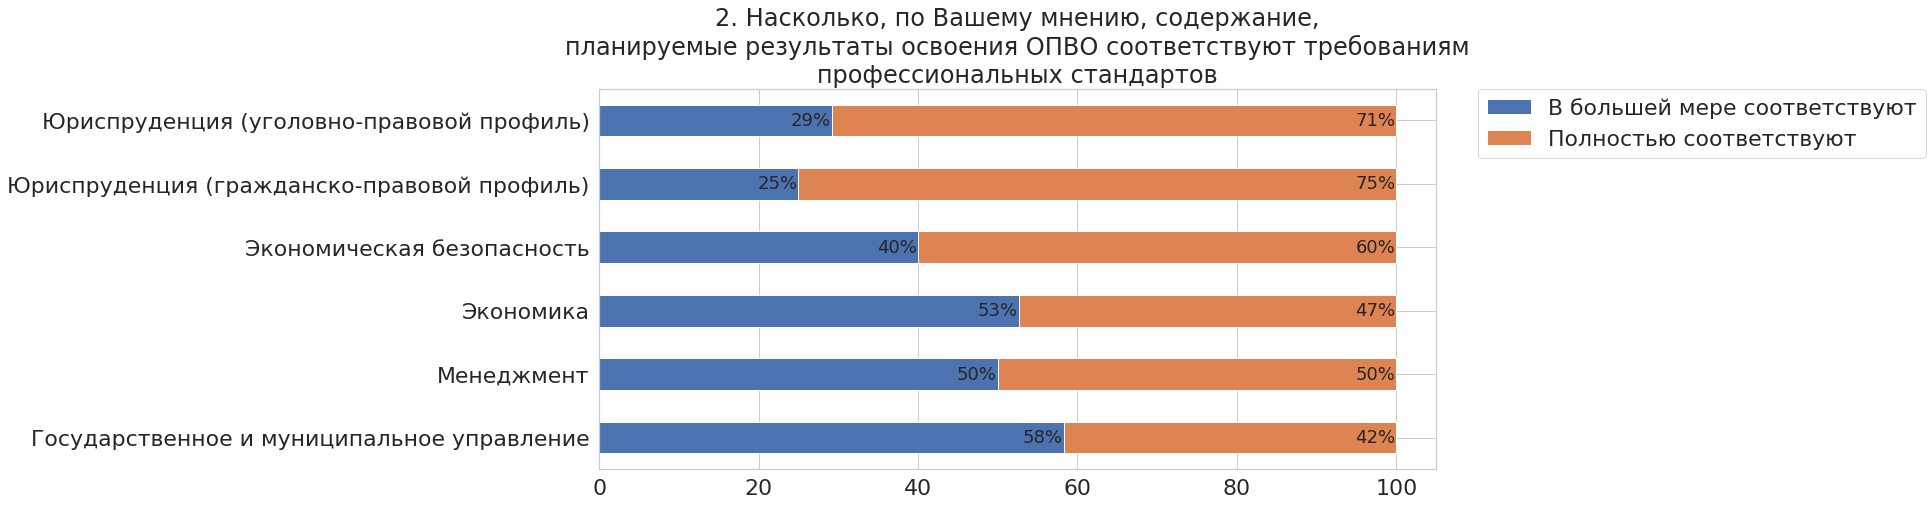

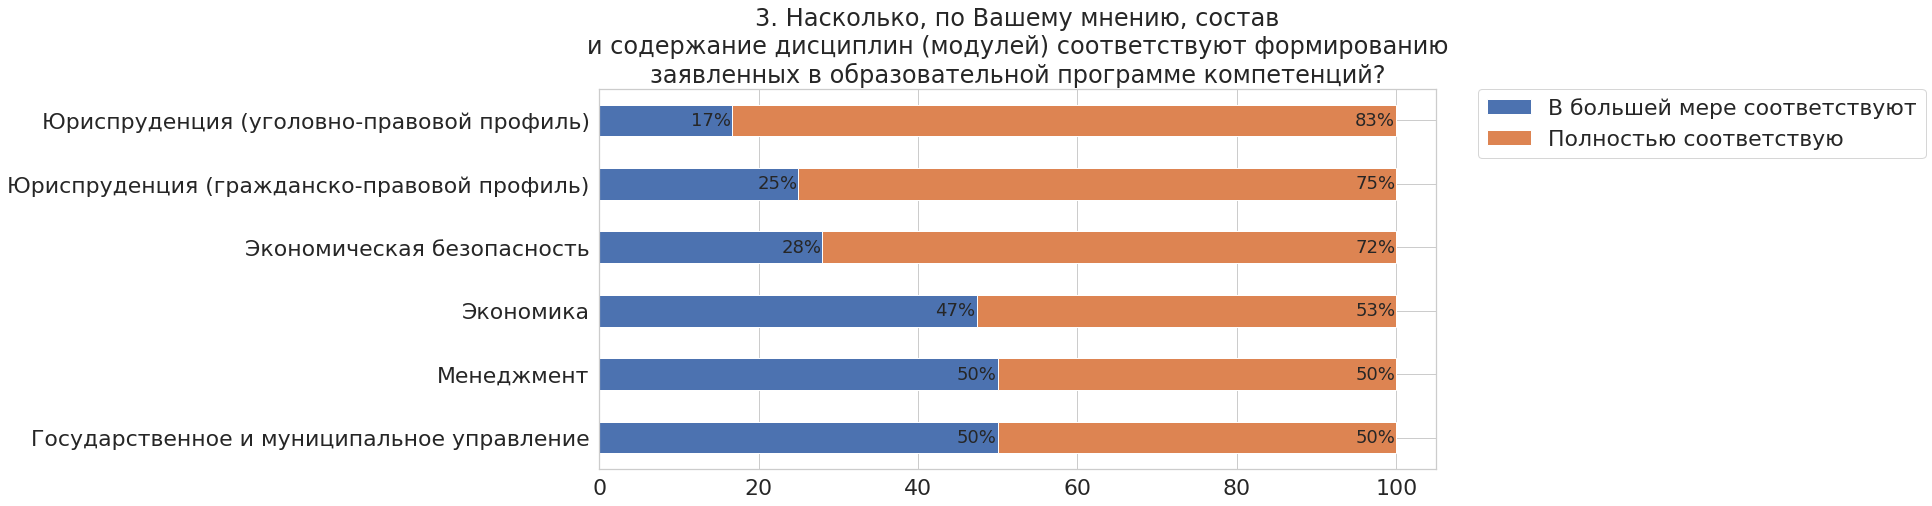

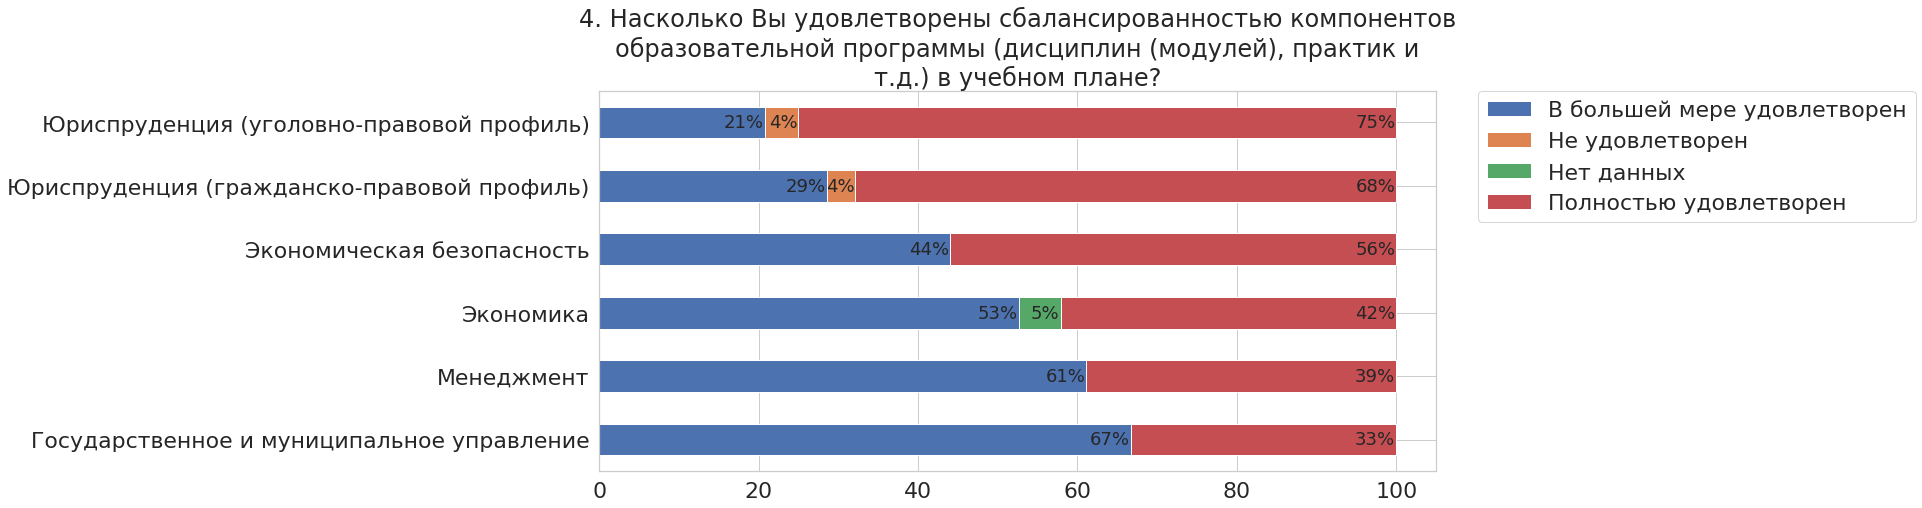

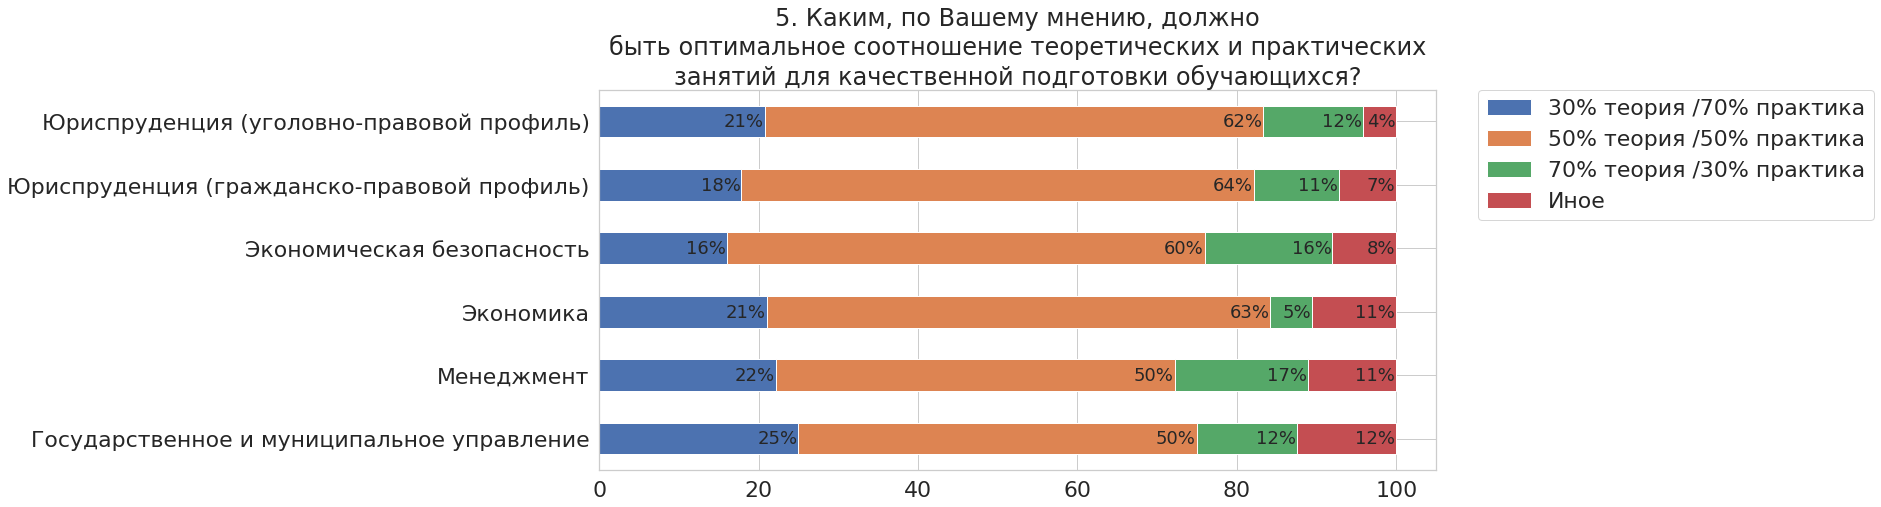

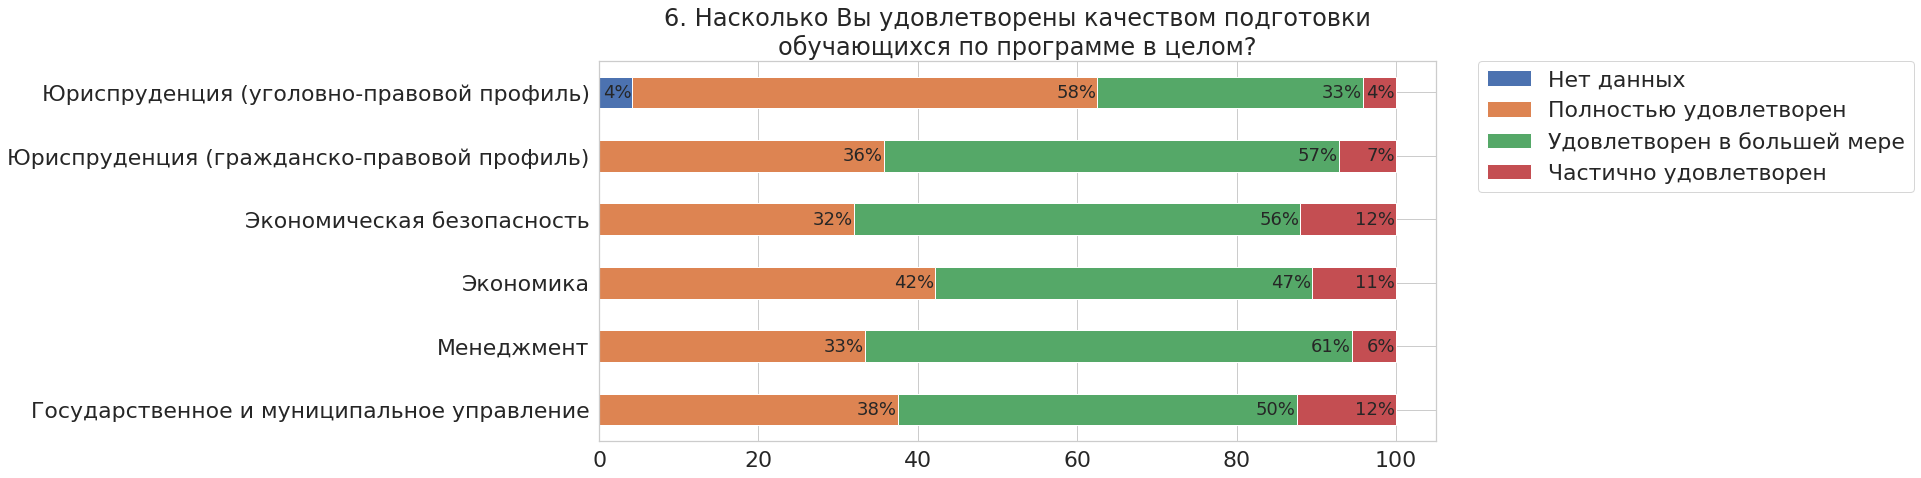

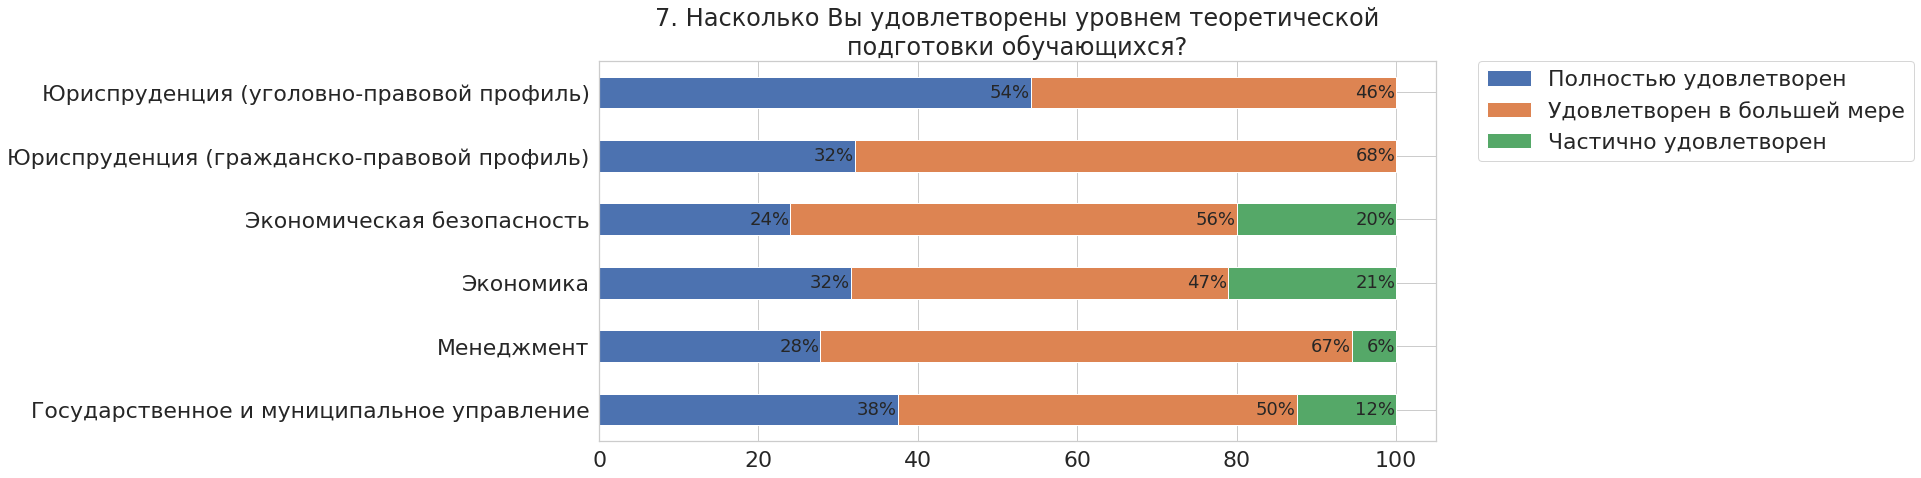

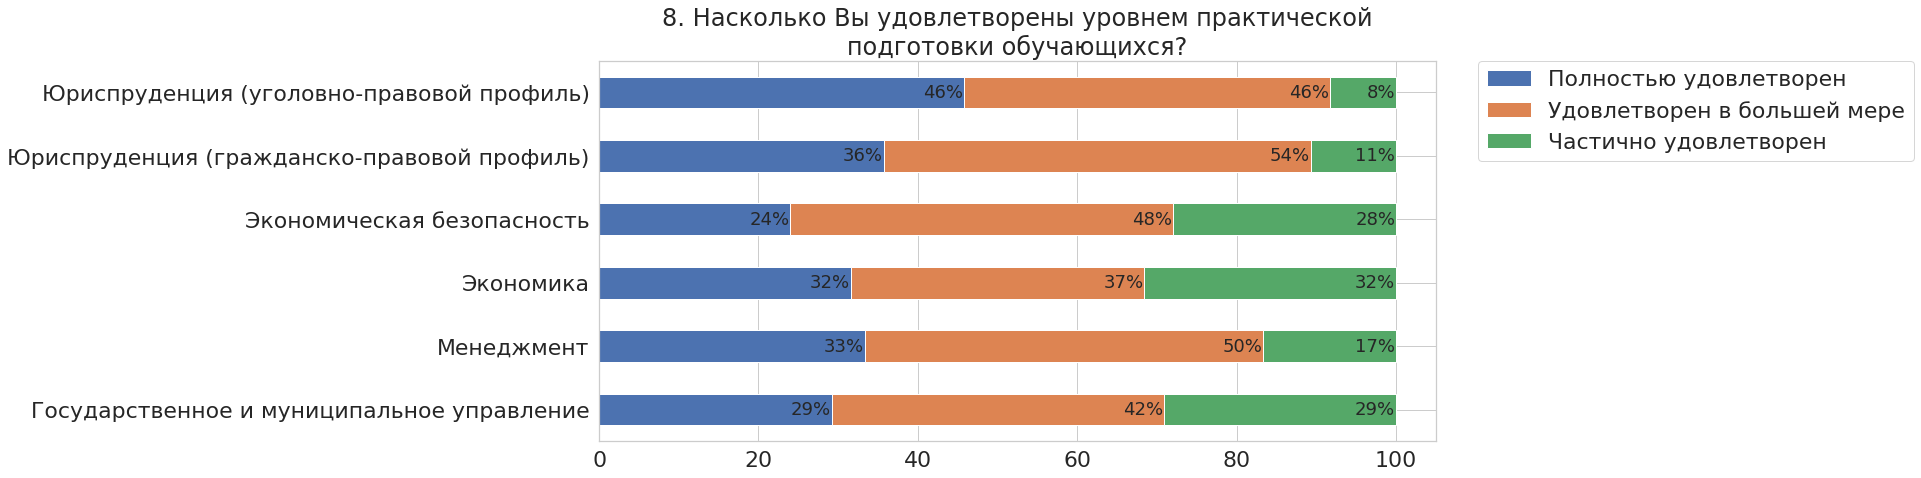

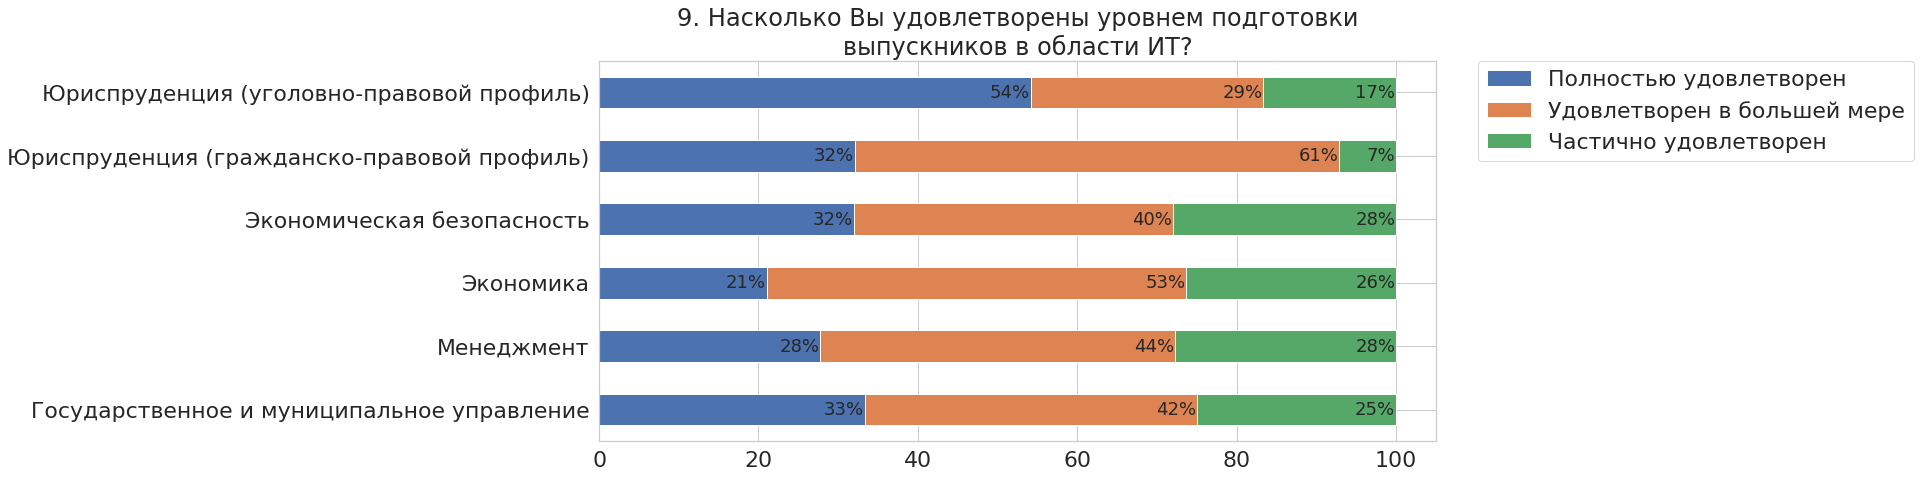

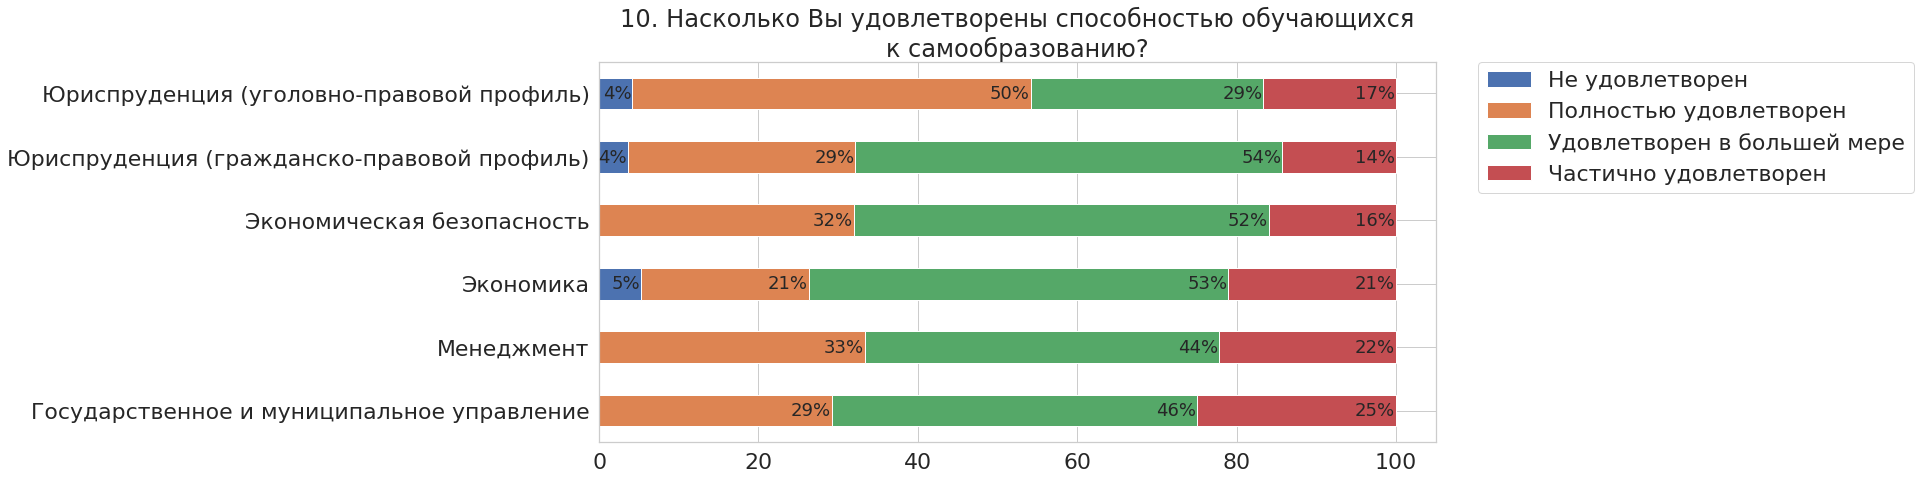

In [13]:
# визуализация результатов
sns.set(
    font_scale=2,
    style='whitegrid',
    rc={'figure.figsize': (15, 7)}
)

for k in range(len(results)):
  g = results[k][results[k].columns[:-1]].plot.barh(stacked=True)
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
  name = names[k].split()
  plt.title('\n'.join(' '.join(name[i:i+6]) for i in range(0, len(name), 6)))

  data = []
  for i in results[k][results[k].columns[:-1]]:
    for j in results[k][i].tolist():
      data.append(j)

  for rect, col in zip(g.patches, data):
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    label_text = f'{round(col)}%'

    label_x = x + width - 0.125
    label_y = y + height / 2

    if height > 0.001 and col > 0:
        g.text(label_x, label_y, label_text, ha='right', va='center', fontsize=18)
    plt.ylabel(None)

In [14]:
# отберем магистров
df_mag = df.query('Уровень_образования == "Магистратура"')

In [15]:
results = []
# строим сводную таблицу для каждого столбца
for col in df_mag[[x for x in df_mag.columns if x not in ('Уровень_образования', 'Направление_подготовки')]]:
  res = count_results = df_mag.groupby(['Направление_подготовки', col], as_index=False) \
    .agg({'Уровень_образования': 'count'}) \
    .pivot(index='Направление_подготовки', columns=col, values='Уровень_образования') \
    .fillna(0)
  res['Итог'] = np.sum(res[res.columns], axis=1) # считаем общий итог
  
  # пересчитываем в проценты для каждой сводной таблицы
  for r in res.columns:
    res[f'{r}'] = (res[f'{r}'] / res['Итог'] * 100).round(2)
  results.append(res) # добавляем в общий список

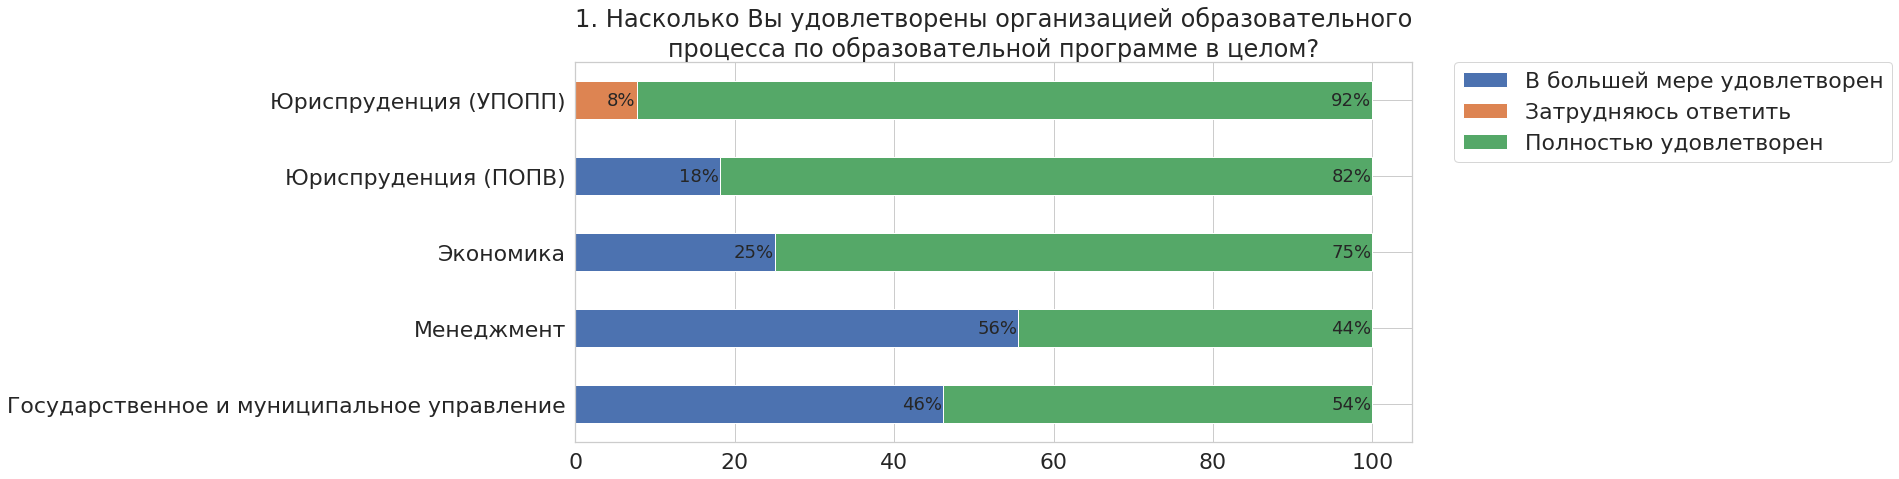

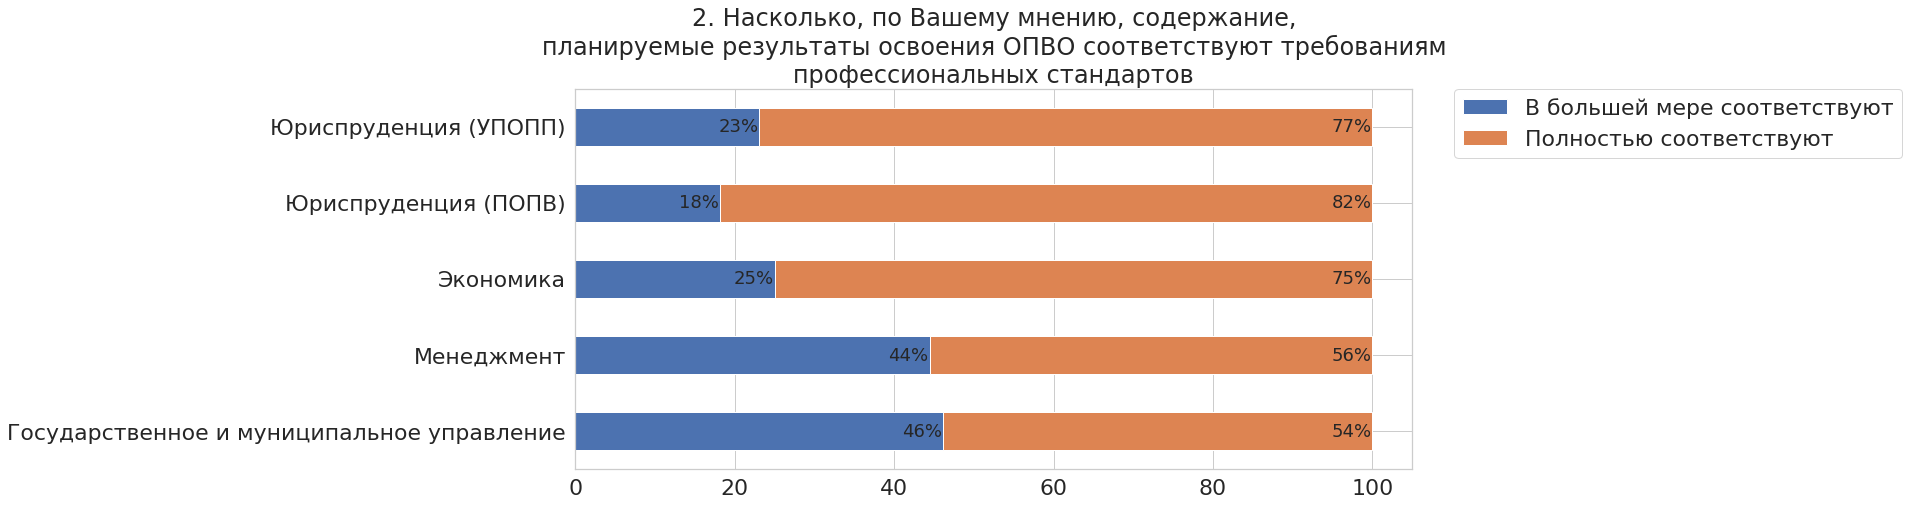

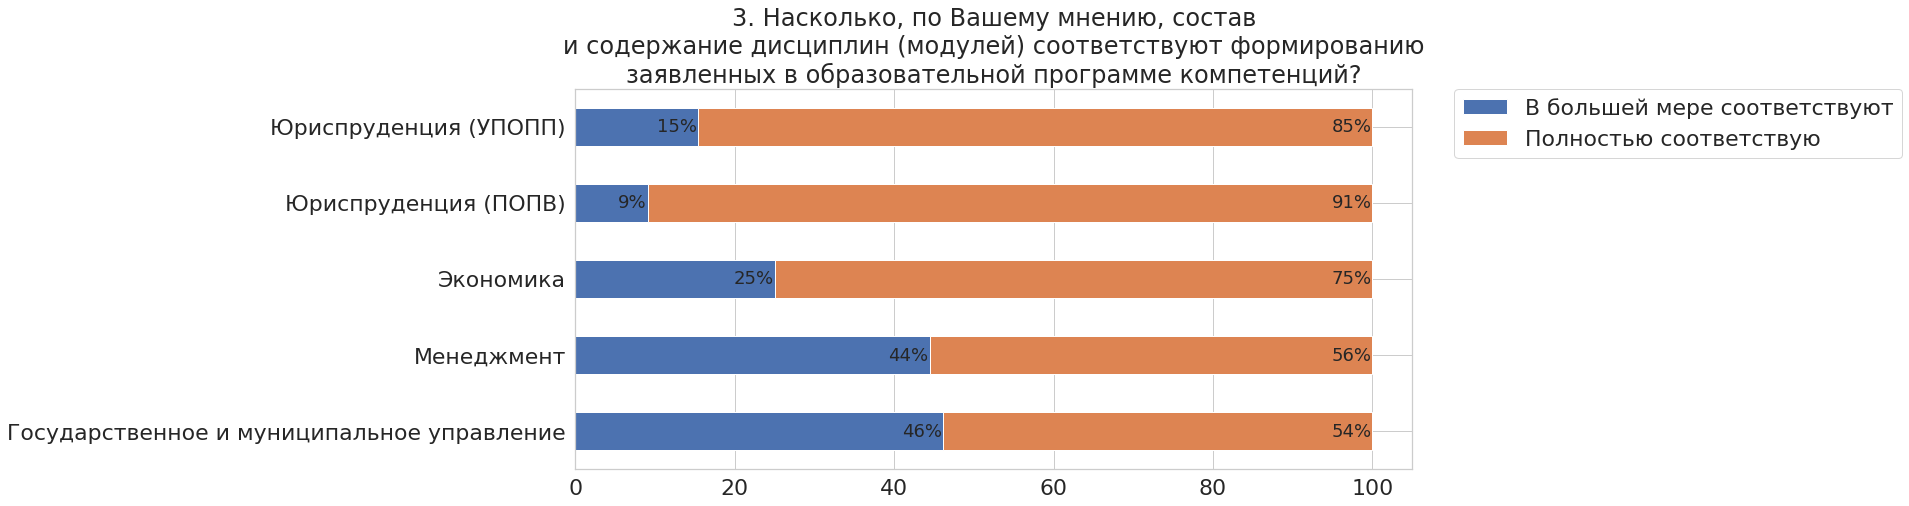

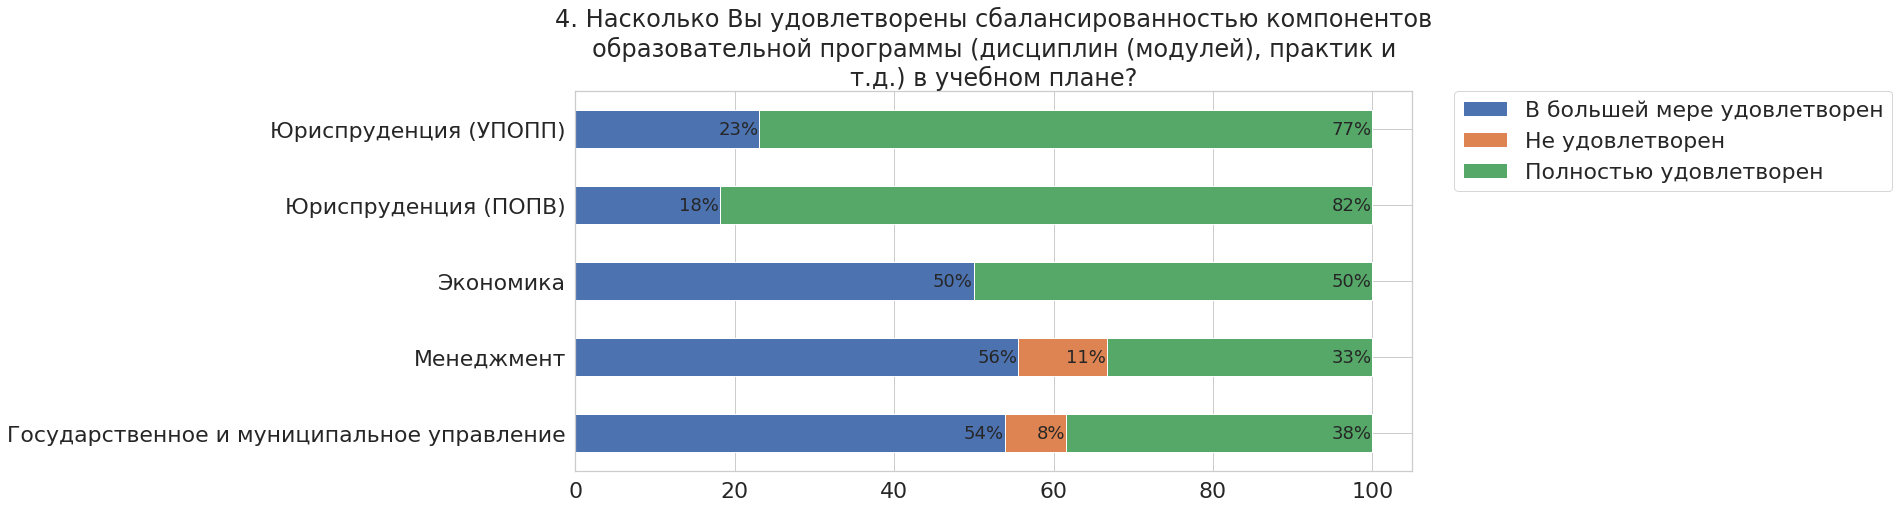

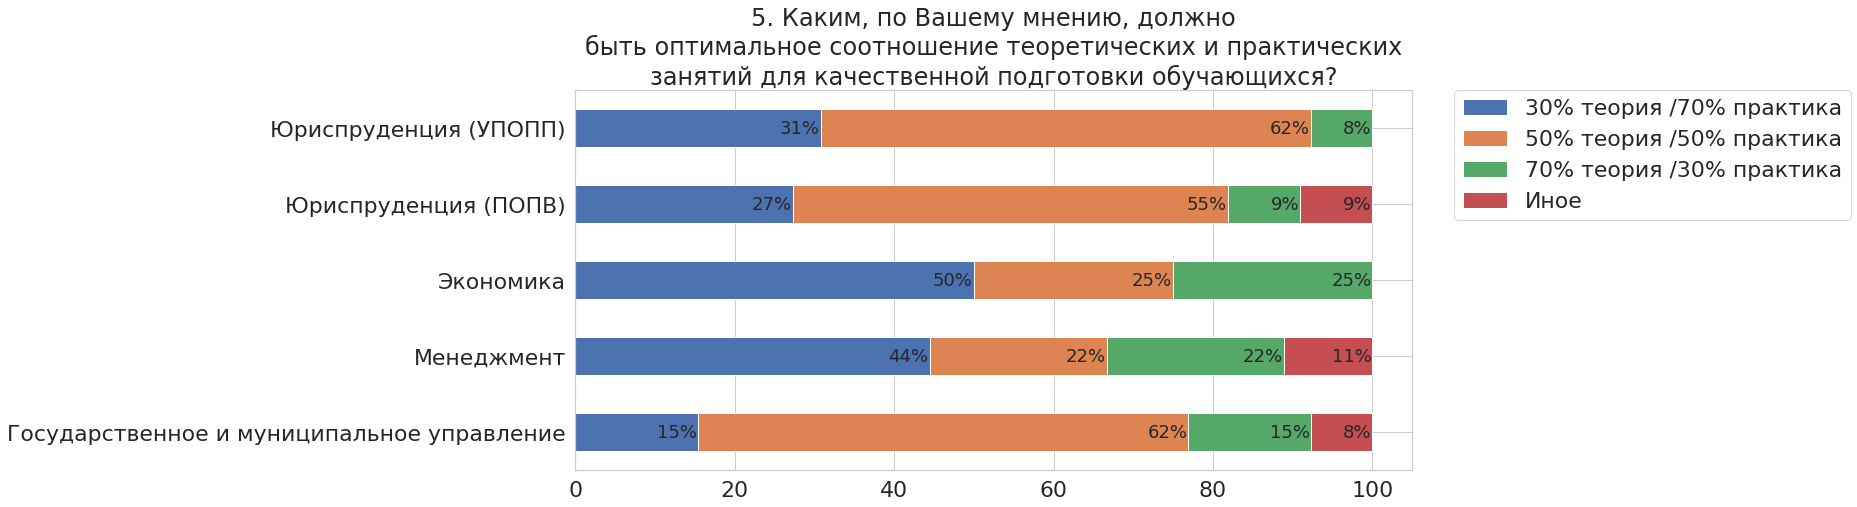

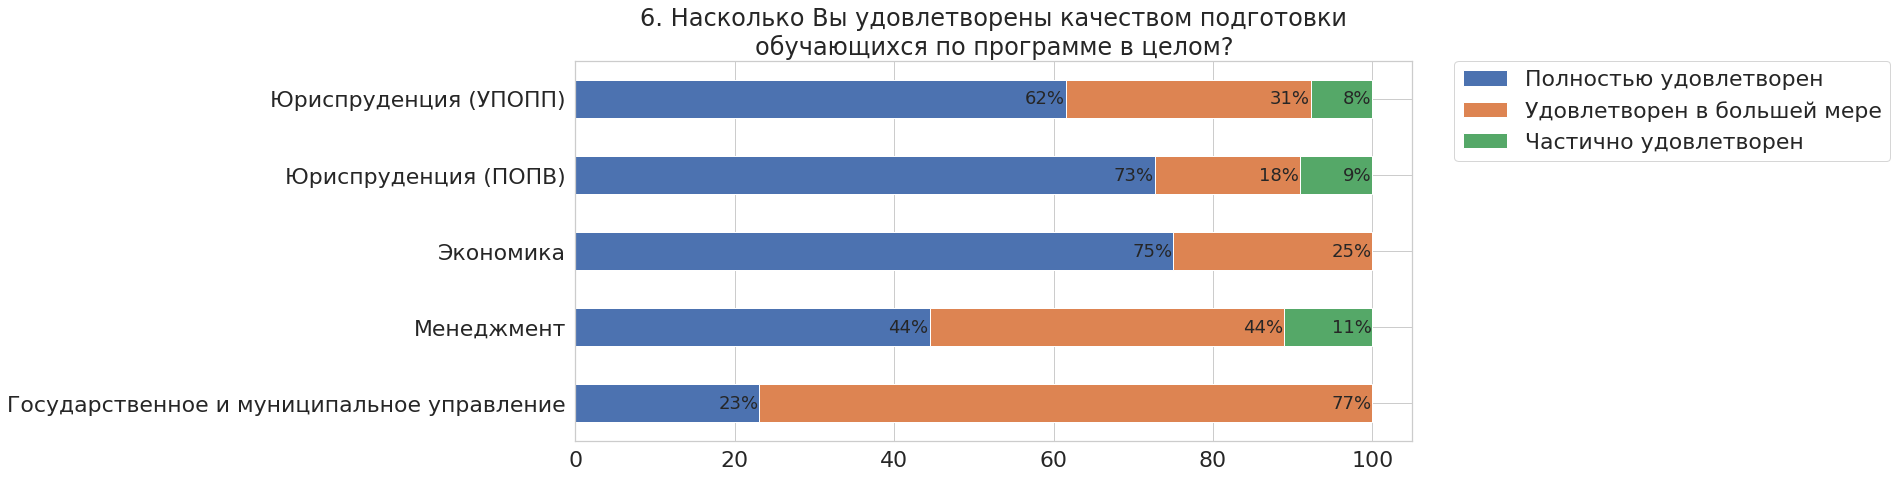

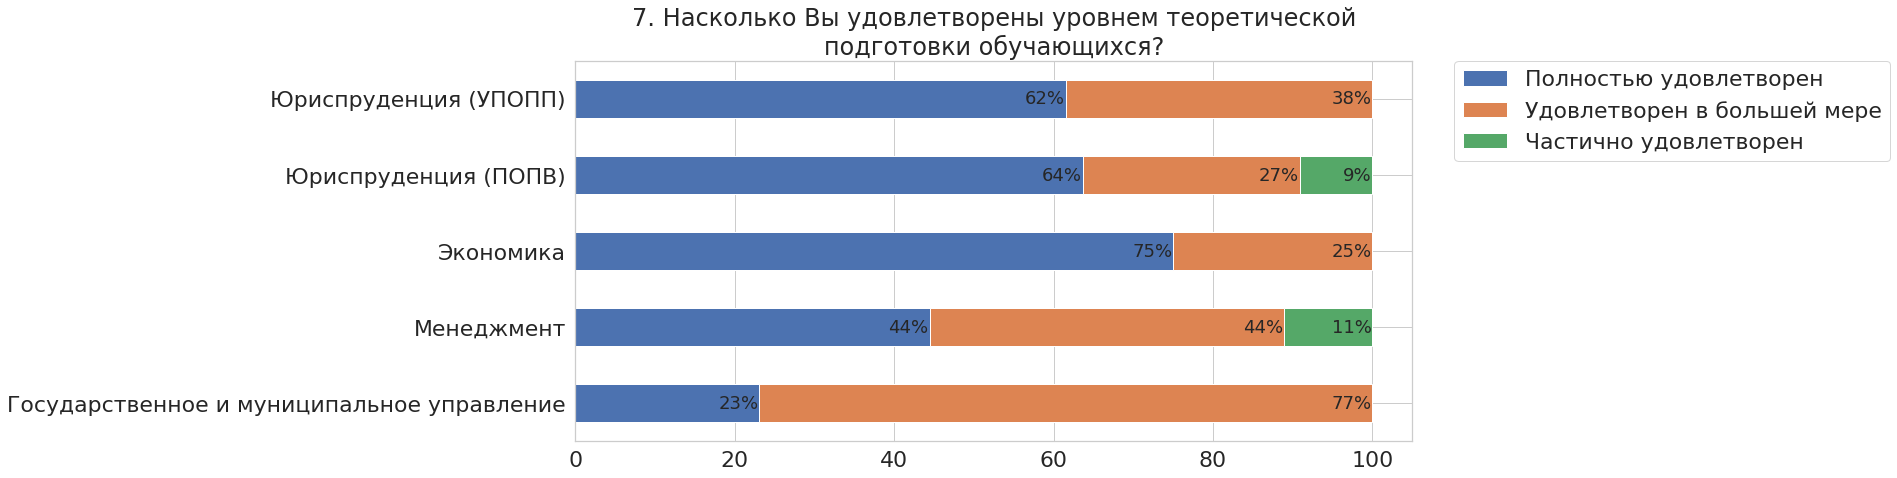

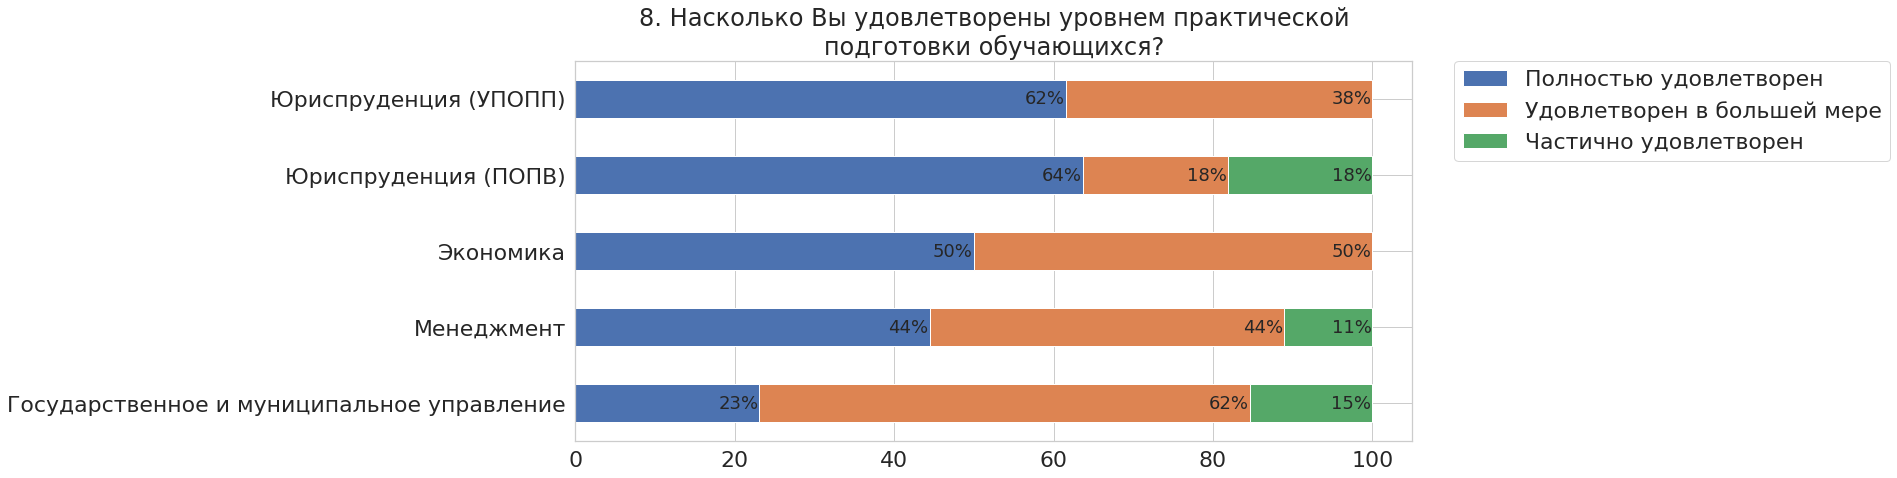

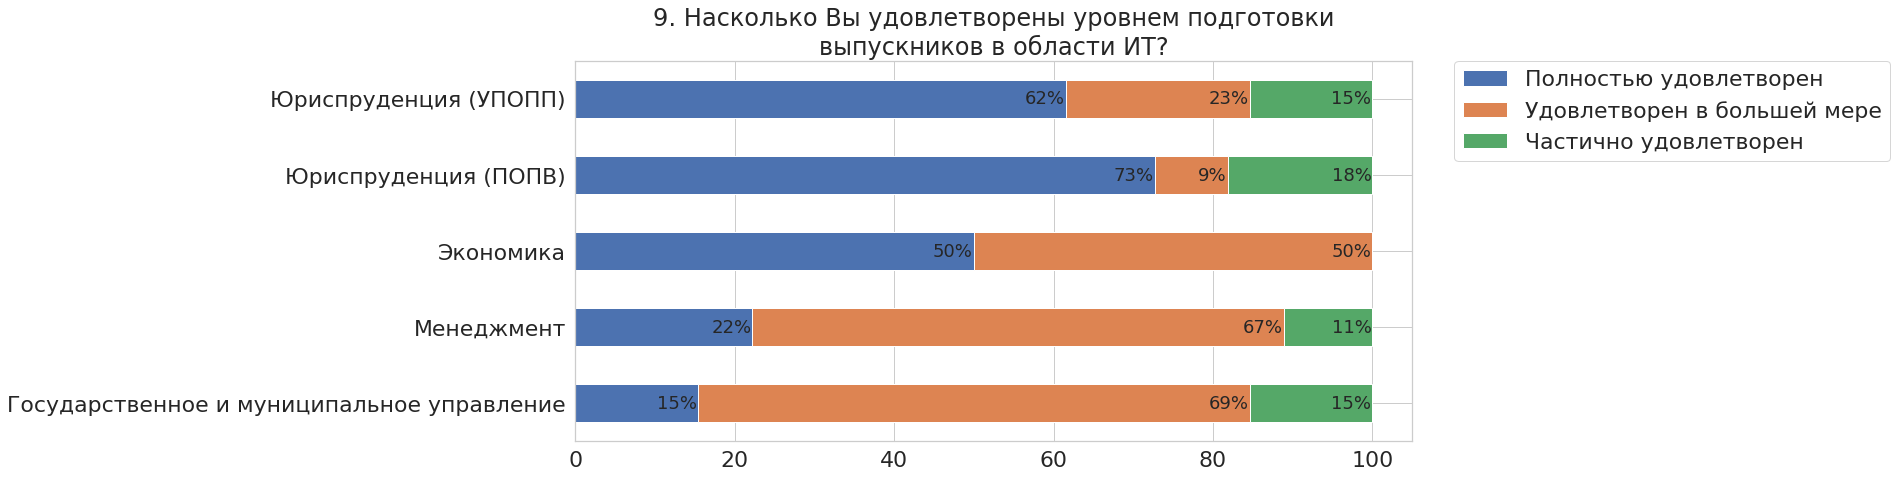

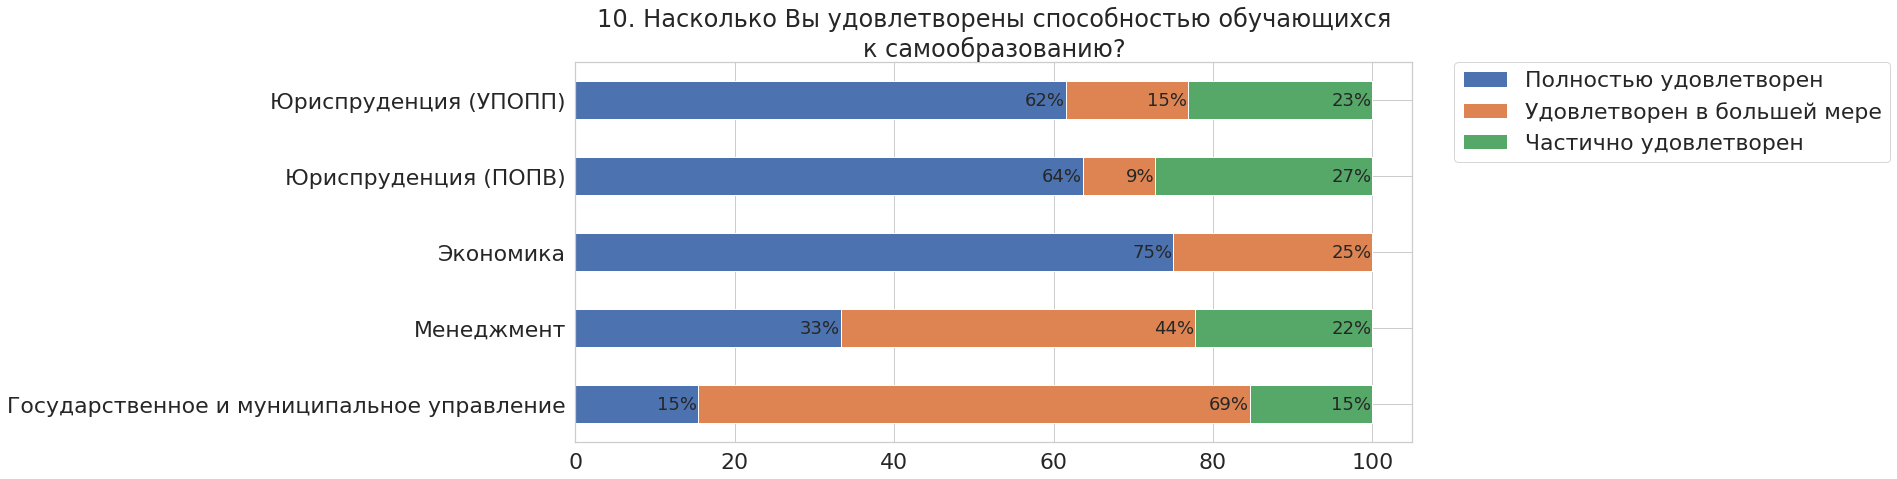

In [16]:
# визуализация результатов
sns.set(
    font_scale=2,
    style='whitegrid',
    rc={'figure.figsize': (15, 7)}
)

for k in range(len(results)):
  g = results[k][results[k].columns[:-1]].plot.barh(stacked=True)
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
  name = names[k].split()
  plt.title('\n'.join(' '.join(name[i:i+6]) for i in range(0, len(name), 6)))

  data = []
  for i in results[k][results[k].columns[:-1]]:
    for j in results[k][i].tolist():
      data.append(j)

  for rect, col in zip(g.patches, data):
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    label_text = f'{round(col)}%'

    label_x = x + width - 0.125
    label_y = y + height / 2

    if height > 0.001 and col > 0:
        g.text(label_x, label_y, label_text, ha='right', va='center', fontsize=18)
    plt.ylabel(None)